In [1]:
import random
import pickle

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, matthews_corrcoef
from sklearn.model_selection import KFold
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

2025-07-23 15:23:28.370903: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/lab2208/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    a

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/lab2208/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/lab2208/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/lab2208/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/home/la

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/lab2208/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/lab2208/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/lab2208/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/home/la

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [ ]:
features = "pca_mfcc_20_no_pitch_1000_rand"

with open(f"../../data/extracted_features_v2/{features}.pickle", "rb") as file:
   mfcc_stats_dict = pickle.load(file)

print(len(mfcc_stats_dict.keys()))

for reader in mfcc_stats_dict.keys():
    print(f"reader: {reader} | # samples {len(mfcc_stats_dict[reader])}")

In [36]:
def calculate_roc_auc(metric_dict):
    roc_auc_list = []
    for speaker in metric_dict.keys():
        fpr = metric_dict[speaker]["best_model"]['fpr']
        tpr = metric_dict[speaker]["best_model"]['tpr']
        roc_auc_list.append(np.trapezoid(tpr, fpr))
    
    return roc_auc_list

def save_metrics_kfold(metric_dict, output_file=f"./metrics"):

    accuracies = [metrics['accuracy'] for metrics in metric_dict.values()]
    precisions = [metrics['precision'] for metrics in metric_dict.values()]
    recalls = [metrics['recall'] for metrics in metric_dict.values()]
    f1_scores = [metrics['f1'] for metrics in metric_dict.values()]
    roc_aucs = calculate_roc_auc(metric_dict)
    mse = [metrics['mse'] for metrics in metric_dict.values()]
    eers = [metrics['eer'] for metrics in metric_dict.values()]
    mcc = [metrics['mcc'] for metrics in metric_dict.values()]

    def five_num_summary(values):
        return {
            'min': np.min(values),
            'q1': np.percentile(values, 25),
            'median': np.median(values),
            'q3': np.percentile(values, 75),
            'max': np.max(values),
            'mean': np.mean(values)
        }
    
    accuracy_summary = five_num_summary(accuracies)
    precision_summary = five_num_summary(precisions)
    recall_summary = five_num_summary(recalls)
    f1_summary = five_num_summary(f1_scores)
    mse_summary = five_num_summary(mse)
    roc_auc_summary = five_num_summary(roc_aucs)
    eer_summary = five_num_summary(eers)  
    mcc_summary = five_num_summary(mcc)  

    with open(output_file, 'w') as f:
        f.write(f"summary: \n")
        f.write(f"    five num sum accuracy : {accuracy_summary['min']:.4f} | {accuracy_summary['q1']:.4f} | {accuracy_summary['median']:.4f} | {accuracy_summary['q3']:.4f} | {accuracy_summary['max']:.4f} | mean: {accuracy_summary['mean']:.4f}\n")
        f.write(f"    five num sum precision: {precision_summary['min']:.4f} | {precision_summary['q1']:.4f} | {precision_summary['median']:.4f} | {precision_summary['q3']:.4f} | {precision_summary['max']:.4f} | mean: {precision_summary['mean']:.4f}\n")
        f.write(f"    five num sum recall   : {recall_summary['min']:.4f} | {recall_summary['q1']:.4f} | {recall_summary['median']:.4f} | {recall_summary['q3']:.4f} | {recall_summary['max']:.4f} | mean: {recall_summary['mean']:.4f}\n")
        f.write(f"    five num sum F1-score : {f1_summary['min']:.4f} | {f1_summary['q1']:.4f} | {f1_summary['median']:.4f} | {f1_summary['q3']:.4f} | {f1_summary['max']:.4f} | mean: {f1_summary['mean']:.4f}\n")
        f.write(f"    five num sum ROC AUC  : {roc_auc_summary['min']:.4f} | {roc_auc_summary['q1']:.4f} | {roc_auc_summary['median']:.4f} | {roc_auc_summary['q3']:.4f} | {roc_auc_summary['max']:.4f} | mean: {roc_auc_summary['mean']:.4f}\n")
        f.write(f"    five num sum MSE      : {mse_summary['min']:.4f} | {mse_summary['q1']:.4f} | {mse_summary['median']:.4f} | {mse_summary['q3']:.4f} | {mse_summary['max']:.4f} | mean: {mse_summary['mean']:.4f}\n")
        f.write(f"    five num sum EER      : {eer_summary['min']:.4f} | {eer_summary['q1']:.4f} | {eer_summary['median']:.4f} | {eer_summary['q3']:.4f} | {eer_summary['max']:.4f} | mean: {eer_summary['mean']:.4f}\n")
        f.write(f"    five num sum MCC      : {mcc_summary['min']:.4f} | {mcc_summary['q1']:.4f} | {mcc_summary['median']:.4f} | {mcc_summary['q3']:.4f} | {mcc_summary['max']:.4f} | mean: {mcc_summary['mean']:.4f}\n")
        
        f.write("\n")

        for key, metrics in metric_dict.items():
            f.write(f"{key}:\n")
            f.write(f"    accuracy: {metrics['accuracy']:.4f}\n")
            f.write(f"    precision: {metrics['precision']:.4f}\n")
            f.write(f"    recall: {metrics['recall']:.4f}\n")
            f.write(f"    F1-score: {metrics['f1']:.4f}\n")
            f.write(f"    ROC AUC: {metrics['roc_auc']:.4f}\n")
            f.write(f"    MSE: {metrics['mse']:.4f}\n")
            f.write(f"    EER: {metrics['eer']:.4f}\n")
            f.write(f"    MCC: {metrics['mcc']:.4f}\n")

        f.write("\n")

    return metric_dict

def plot_roc_cross_validation(metrics, save_dir=None):
    """
    Plots the ROC curve for cross-validation results.
    
    Parameters:
        metrics (list): A list of metrics dictionaries from cross-validation.
        save_dir (str): Directory to save the plot.
    """
    plt.figure(figsize=(10, 8))

    for speaker in metrics.keys():
        plt.plot(metrics[speaker]["best_model"]['fpr'], metrics[speaker]["best_model"]['tpr'])
        
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for CNN Cross-Validation')
    plt.legend(loc="lower right")
    plt.grid()

    if save_dir:    
        plt.savefig(save_dir)
    plt.show()
    plt.close()

def print_metrics(metrics):
    print("Model Evaluation Metrics:")
    for key, value in metrics.items():
        if isinstance(value, np.float64):
            print(f"{key.capitalize()}: {value:.4f}")
        elif isinstance(value, dict):
            print(f"{key.capitalize()}:")
            print_metrics(value)  # Recursive call for nested dictionaries
        elif isinstance(value, np.ndarray):
            print(f"{key.capitalize()}: Array of {len(value)} elements")
        else:
            print(f"{key.capitalize()}: {value}")

In [4]:
def generate_random_indices(n, x, seed=42):
    if n > x + 1:
        raise ValueError("Cannot generate more unique numbers than the specified range.")
    
    random.seed(seed)  # Set the seed for reproducibility
    return random.sample(range(0, x), n)

def generate_binary_test_set(data_dict, key):
    if key not in data_dict:
        raise KeyError(f"The key '{key}' does not exist in the dictionary.")
    
    true_values = data_dict[key] # Get the list corresponding to the key

    num_other_classes = len(data_dict.keys()) - 1
    num_of_true_samples = len(true_values)

    samples_per_class = num_of_true_samples // num_other_classes
    # print(f"samples per class: {samples_per_class}")

    random_indices = generate_random_indices(samples_per_class, num_of_true_samples)

    test_set = true_values.copy()  # Start with the list for the specified key
    
    if isinstance(test_set, np.ndarray):
        test_set = test_set.tolist()

    for k, v in data_dict.items():
        if k != key:  # Skip the list that corresponds to the key
            for i in random_indices:
                test_set.append(v[i])

    return test_set, num_of_true_samples

def split_dict(data, train_ratio=0.8):
    random.seed(42)
    keys = list(data.keys())
    random.shuffle(keys)  # Shuffle the keys to randomize the split
    split_point = int(len(keys) * train_ratio)
    
    train_keys = keys[:split_point]
    test_keys = keys[split_point:]
    
    train_dict = {key: data[key] for key in train_keys}
    test_dict = {key: data[key] for key in test_keys}
    
    return train_dict, test_dict

def get_random_entries(original_dict, n):
    """
    Selects n random entries from the input dictionary.

    Args:
        original_dict (dict): The original dictionary to select entries from.
        n (int): The number of random entries to select.

    Returns:
        dict: A new dictionary containing n randomly selected entries.

    Raises:
        ValueError: If n is greater than the number of entries in the dictionary.
    """
    random.seed(42)

    if n > len(original_dict):
        raise ValueError("n cannot be greater than the number of entries in the dictionary.")

    random_keys = random.sample(list(original_dict.keys()), n)
    return {key: original_dict[key] for key in random_keys}

In [12]:
def calculate_eer(fpr, tpr):
    """Calculate Equal Error Rate (EER)."""
    fnr = 1 - tpr
    eer_threshold_index = np.nanargmin(np.abs(fnr - fpr))
    eer = (fpr[eer_threshold_index] + fnr[eer_threshold_index]) / 2
    return eer

def cnn_cross_validate(data_dict, key, n_folds, model):
    data, segments_length = generate_binary_test_set(data_dict, key)
    data = np.vstack(data)
    ground_truth = np.array([0] * segments_length + [1] * (len(data) - segments_length))

    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    metrics_list = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1": [],
        "roc_auc": [],
        "mse": [],
        "eer": [],
        "mcc": [],
    }

    best_model_metrics = {
        "fpr" : None,
        "tpr" : None,
        "roc_auc": 0.0,
        "eer": None,
        "model": None,
    }
    
    class FinalMetricsCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            self.final_logs = logs

    for train_idx, test_idx in kf.split(data):
        data_train, data_test = data[train_idx], data[test_idx]
        label_train, label_test = ground_truth[train_idx], ground_truth[test_idx]
        
        label_train = tf.expand_dims(label_train, axis=-1)
        label_test = tf.expand_dims(label_test, axis=-1)

        final_metrics_callback = FinalMetricsCallback()
        model.fit(data_train, label_train, epochs=10, batch_size=32, validation_data=(data_test, label_test), callbacks=[final_metrics_callback])

        test_pred_prob = model.predict(data_test).flatten() 
        fpr, tpr, thresholds = roc_curve(label_test, test_pred_prob)
        test_pred_binary = (test_pred_prob >= 0.5).astype(int)

        metrics_list["accuracy"].append(final_metrics_callback.final_logs.get("accuracy", 0))
        metrics_list["precision"].append(final_metrics_callback.final_logs.get("precision", 0))
        metrics_list["recall"].append(final_metrics_callback.final_logs.get("recall", 0))
        metrics_list["f1"] .append(final_metrics_callback.final_logs.get("F1Score", 0))
        metrics_list["roc_auc"].append(final_metrics_callback.final_logs.get("AUC", 0))
        metrics_list["mse"].append(final_metrics_callback.final_logs.get("MeanSquaredError", 0))
        metrics_list["mcc"].append(matthews_corrcoef(label_test, test_pred_binary))

        roc_auc = final_metrics_callback.final_logs.get("AUC", 0)
        metrics_list["roc_auc"].append(roc_auc)
        eer = calculate_eer(fpr, tpr)
        metrics_list["eer"].append(eer)

        # Update the best model if the current fold has a better ROC AUC score
        if roc_auc > best_model_metrics["roc_auc"]:
            # fpr, tpr, _ = roc_curve(label_test, decision_scores)
            best_model_metrics["fpr"] = fpr
            best_model_metrics["tpr"] = tpr
            best_model_metrics["roc_auc"] = roc_auc
            best_model_metrics["eer"] = eer  # Save EER for the best model
            best_model_metrics["model"] = model  # Save the best SVM model

    # Compute the mean of each metric
    mean_metrics = {
        metric: (np.mean(scores) if metric not in ["fpr", "tpr"] else scores)
        for metric, scores in metrics_list.items()
    }
    mean_metrics["best_model"] = best_model_metrics

    return mean_metrics

def cnn_cross_validate_wrapper(data_dict, model, n_folds=5):
    metric_dict = {}

    for key in data_dict.keys():
        metric_dict[key] = cnn_cross_validate(data_dict, key, n_folds, model)

    return(metric_dict)

In [6]:
model_1 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_1.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_2 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_2.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_3 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_3.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_4 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_4.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_5 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_5.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_6 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_6.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_7 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_7.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_8 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_8.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_9 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_9.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_10 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(32, kernel_size=5, activation='relu'),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_10.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_11 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_11.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_12 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(32, kernel_size=3, activation='sigmoid'),
    layers.Conv1D(32, kernel_size=3, activation='sigmoid'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_12.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_13 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(32, kernel_size=3, activation='softmax'),
    layers.Conv1D(32, kernel_size=3, activation='softmax'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='softmax'),
    layers.Dense(32, activation='softmax'),
    layers.Dense(16, activation='softmax'),
    layers.Dense(8, activation='softmax'),
    layers.Dense(1, activation='sigmoid')
])
model_13.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)

model_14 = models.Sequential([
    layers.Input(shape=(71,1)),
    layers.Conv1D(32, kernel_size=3, activation='sigmoid'),
    layers.Conv1D(32, kernel_size=3, activation='sigmoid'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])
model_14.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=["accuracy", "precision", "recall", "F1Score", "AUC", "MeanSquaredError"]
)


In [46]:
mfcc_stats_dict_small = get_random_entries(mfcc_stats_dict, 25)
metrics_and_models_small = cnn_cross_validate_wrapper(mfcc_stats_dict_small, model_14, 5)
save_metrics_kfold(metrics_and_models_small, output_file=f"./metrics/CNN/k-fold_{features}_model_14.txt")

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.5218 - F1Score: 0.6455 - MeanSquaredError: 0.2538 - accuracy: 0.5230 - loss: 0.7010 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_AUC: 0.5000 - val_F1Score: 0.6811 - val_MeanSquaredError: 0.2502 - val_accuracy: 0.4836 - val_loss: 0.6935 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.4784 - F1Score: 0.6539 - MeanSquaredError: 0.2500 - accuracy: 0.5140 - loss: 0.6932 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_AUC: 0.5000 - val_F1Score: 0.6811 - val_MeanSquaredError: 0.2501 - val_accuracy: 0.4836 - val_loss: 0.6933 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.4678 - F1Score: 0.6487 - MeanSquaredError: 0.2500 - accuracy: 0.5197 - loss: 0.6931 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_AUC: 0.5000 - val_F1Score: 0.6811 - val_MeanSquaredError: 0.2505 - val_accuracy: 0.4836 - val_loss

{'6000': {'accuracy': np.float64(0.6661669373512268),
  'precision': np.float64(0.6643389463424683),
  'recall': np.float64(0.7913922011852265),
  'f1': np.float64(0.6630385279655456),
  'roc_auc': np.float64(0.6708849430084228),
  'mse': np.float64(0.1756948634982109),
  'eer': np.float64(0.16062962845735593),
  'mcc': np.float64(0.33909948887508434),
  'best_model': {'fpr': array([0.        , 0.        , 0.        , 0.00555556, 0.00555556,
          0.01111111, 0.01111111, 0.01666667, 0.01666667, 0.02222222,
          0.02222222, 0.03333333, 0.03333333, 0.03888889, 0.03888889,
          0.04444444, 0.04444444, 0.05      , 0.05      , 0.06666667,
          0.06666667, 0.08333333, 0.08333333, 0.08888889, 0.08888889,
          0.15555556, 0.15555556, 0.78333333, 0.79444444, 1.        ]),
   'tpr': array([0.        , 0.00462963, 0.69444444, 0.69444444, 0.7037037 ,
          0.7037037 , 0.73611111, 0.73611111, 0.82407407, 0.82407407,
          0.93055556, 0.93055556, 0.96296296, 0.9629629

In [7]:
metrics_and_models = cnn_cross_validate_wrapper(mfcc_stats_dict, model_8, 5)
# took 41 min and 43.2 seconds for pca mfcc 20

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - AUC: 0.8518 - F1Score: 0.6594 - MeanSquaredError: 0.1896 - accuracy: 0.7454 - loss: 0.5563 - precision: 0.6873 - recall: 0.9209 - val_AUC: 0.9631 - val_F1Score: 0.6576 - val_MeanSquaredError: 0.0676 - val_accuracy: 0.9167 - val_loss: 0.2548 - val_precision: 0.9820 - val_recall: 0.8454
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9487 - F1Score: 0.6575 - MeanSquaredError: 0.0868 - accuracy: 0.8892 - loss: 0.2935 - precision: 0.9205 - recall: 0.8489 - val_AUC: 0.9708 - val_F1Score: 0.6576 - val_MeanSquaredError: 0.0563 - val_accuracy: 0.9217 - val_loss: 0.2140 - val_precision: 0.8976 - val_recall: 0.9485
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9879 - F1Score: 0.6506 - MeanSquaredError: 0.0383 - accuracy: 0.9508 - loss: 0.1398 - precision: 0.9540 - recall: 0.9439 - val_AUC: 0.9735 - val_F1Score: 0.6576 - val_MeanSquaredError: 0.0448 - val_accuracy: 0.9470 - val_loss: 0.1920 - val_precision: 0.9391 - val_r

In [37]:
save_metrics_kfold(metrics_and_models, output_file=f"./metrics/CNN/k-fold_{features}_model_8_all.txt")

{'103': {'accuracy': np.float64(0.9978482604026795),
  'precision': np.float64(0.998207426071167),
  'recall': np.float64(0.9974450588226318),
  'f1': np.float64(0.6612229347229004),
  'roc_auc': np.float64(0.9997864842414856),
  'mse': np.float64(0.0021584764395697676),
  'eer': np.float64(0.016187048887259296),
  'mcc': np.float64(0.967691557044841),
  'best_model': {'fpr': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
   'tpr': array([0.        , 0.57837838, 0.61081081, 0.62702703, 0.63243243,
          0.64324324, 0.73513514, 0.74594595, 1.        , 1.        ]),
   'roc_auc': 1.0,
   'eer': np.float64(0.0),
   'model': <Sequential name=sequential_7, built=True>}},
 '1034': {'accuracy': np.float64(1.0),
  'precision': np.float64(1.0),
  'recall': np.float64(1.0),
  'f1': np.float64(0.6938104748725891),
  'roc_auc': np.float64(1.0),
  'mse': np.float64(3.852788354592462e-05),
  'eer': np.float64(0.011603452525287734),
  'mcc': np.float64(0.9767817307303668),
  'best_model': {'fpr

C:\Users\odink\AppData\Local\Temp\ipykernel_17756\951417088.py:77: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  roc_auc_list.append(np.trapz(tpr, fpr))
C:\Users\odink\AppData\Local\Temp\ipykernel_17756\951417088.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


0.9417934061447382
0.9952281310605288
0.9981116668367868
0.9994130856384608
1.0
0.9951468459376798


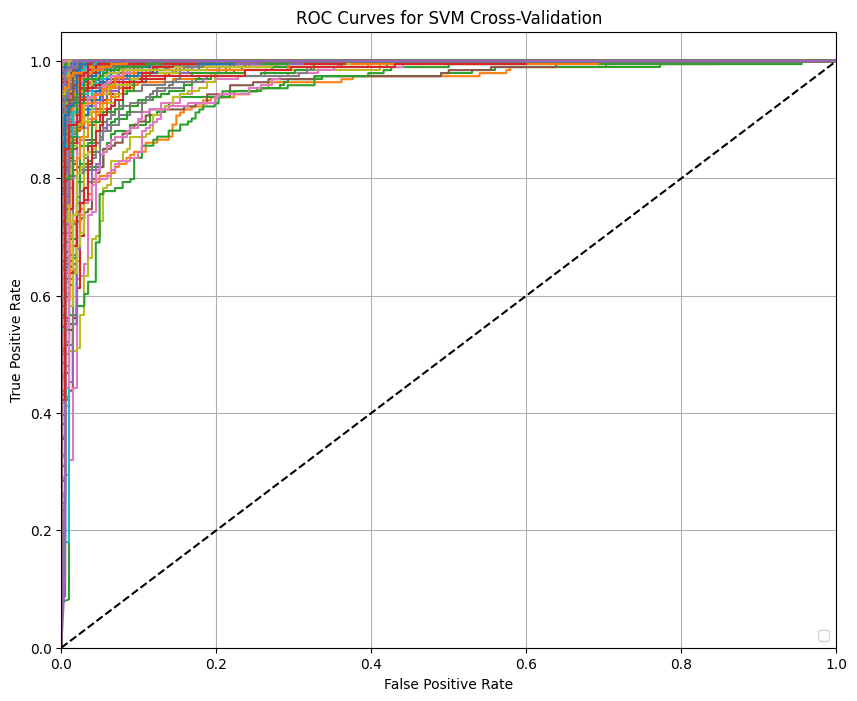

In [33]:
plot_roc_cross_validation(metrics_and_models, save_dir=f"./metrics/CNN/plots/k-fold_{features}")

In [ ]:
cnn_cross_validate(mfcc_stats_dict, "1034", 5, model_1)

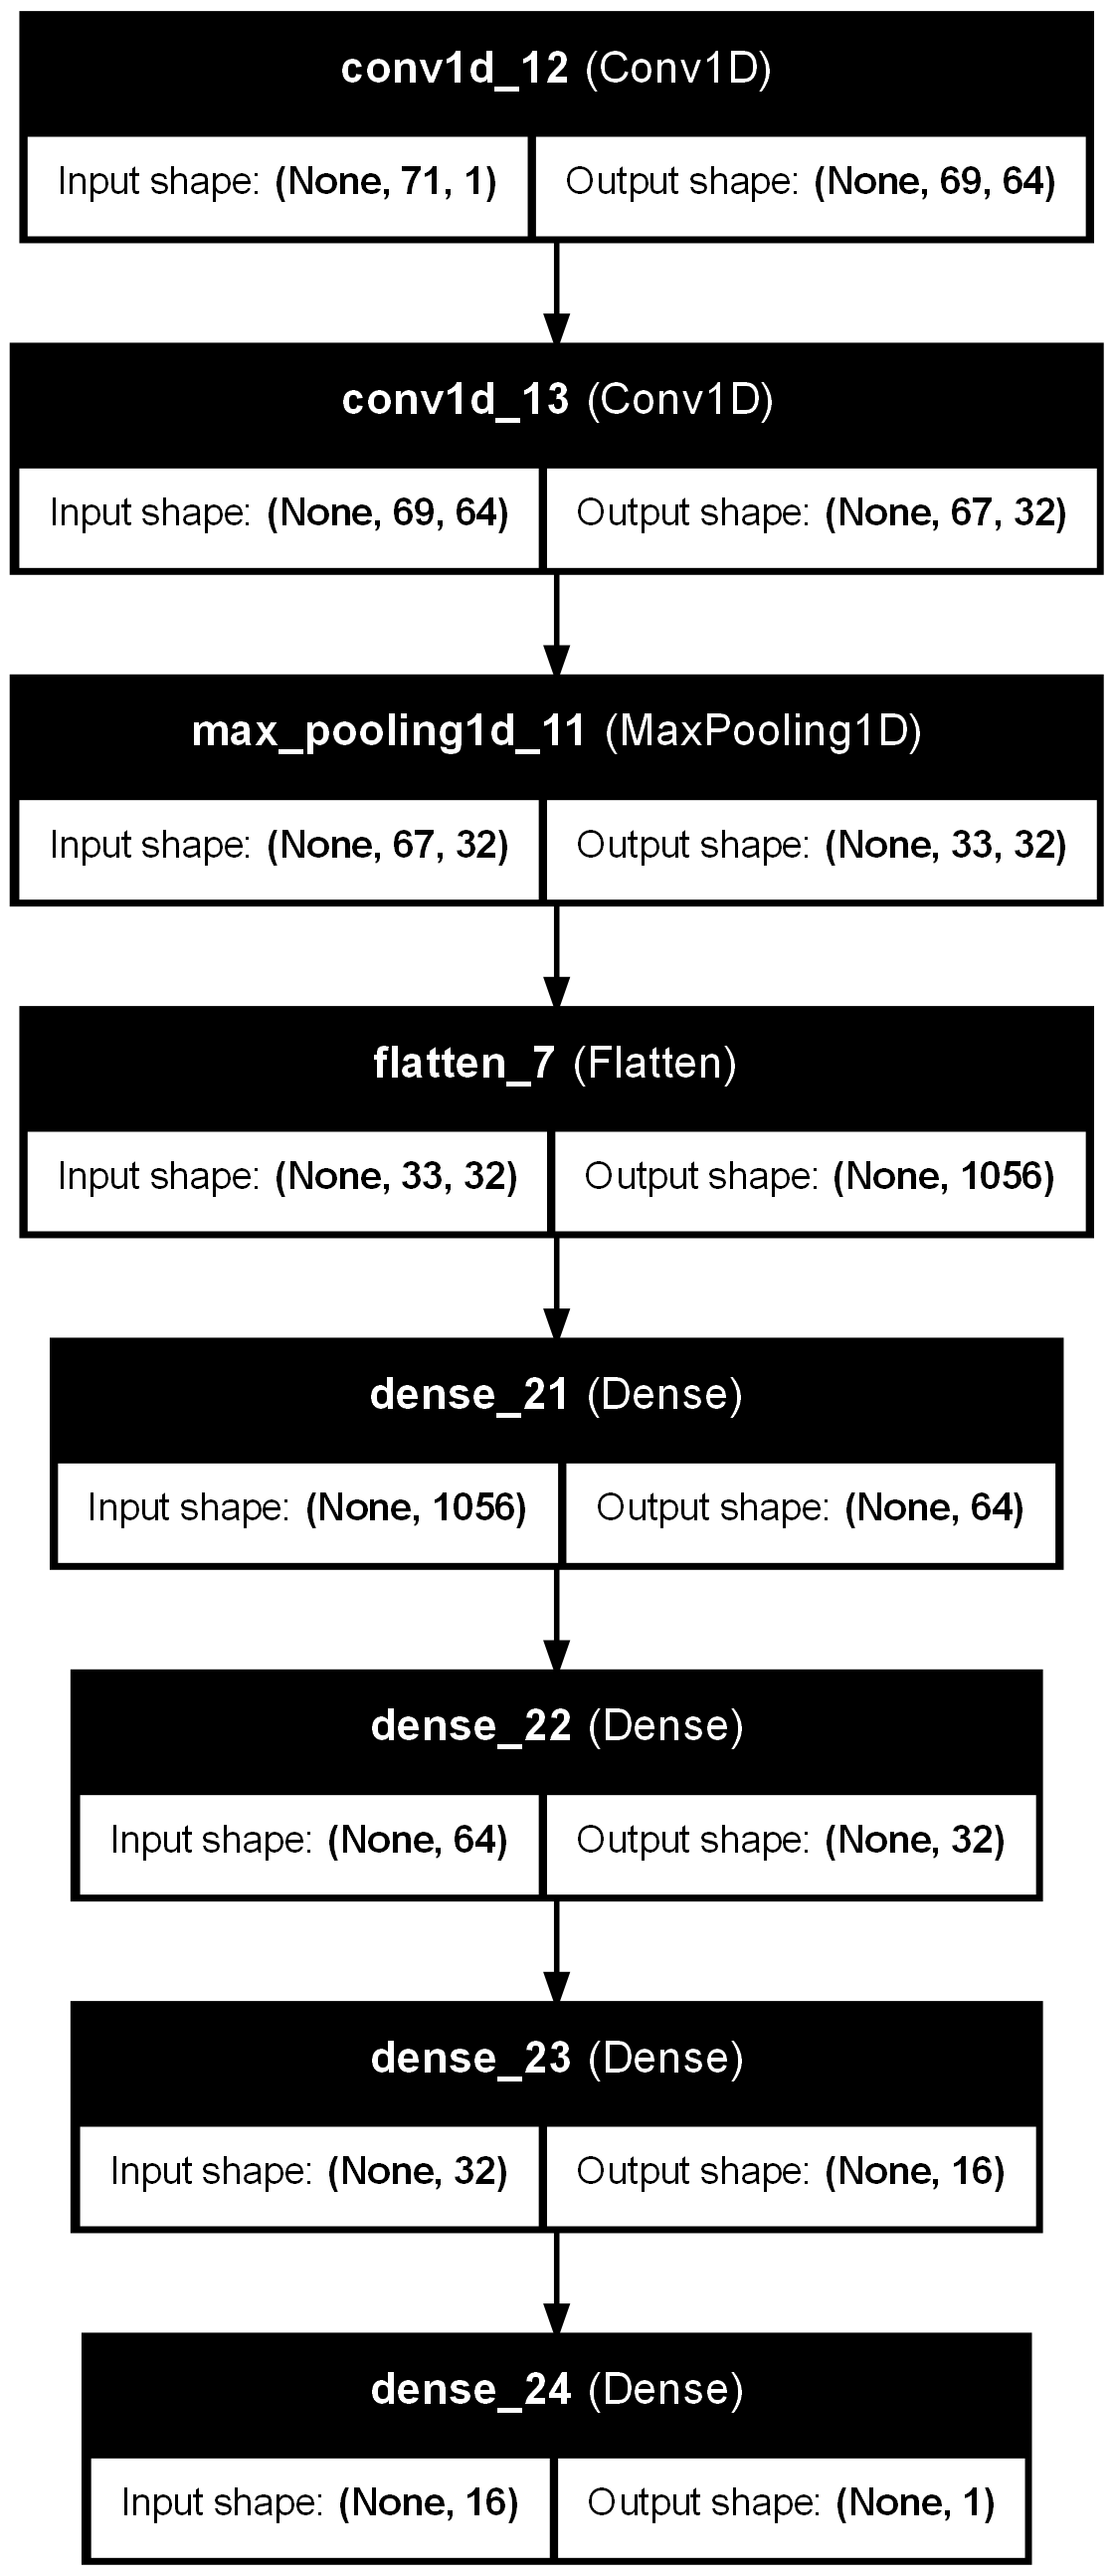

In [3]:
plot_model(model_8, to_file="./model_8.png", show_shapes=True, show_layer_names=True)